In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import cv2

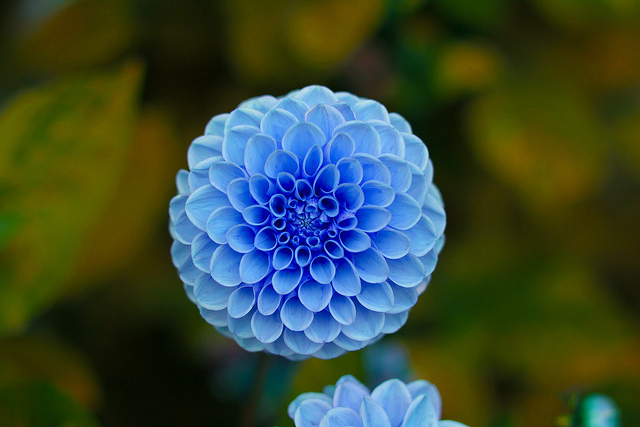

In [2]:
from google.colab.patches import cv2_imshow
from sklearn.datasets import load_sample_image

img = load_sample_image('flower.jpg')
cv2_imshow(img)

In [3]:
img.shape

(427, 640, 3)

In [4]:
img

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [5]:
data = img / 255.0
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [6]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [9]:
img = cv2.imread('/content/drive/MyDrive/Datasets/landscape1.jpeg')

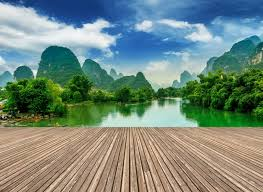

In [10]:
cv2_imshow(img)

In [11]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [13]:
vectorized = img.reshape((-1, 3))
vectorized.shape

(50496, 3)

In [14]:
vectorized = np.float32(vectorized)

In [15]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 4
attempts = 10

In [16]:
ret,label,center=cv2.kmeans(vectorized,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [21]:
label[:10]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [18]:
center = np.uint8(center)

In [23]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

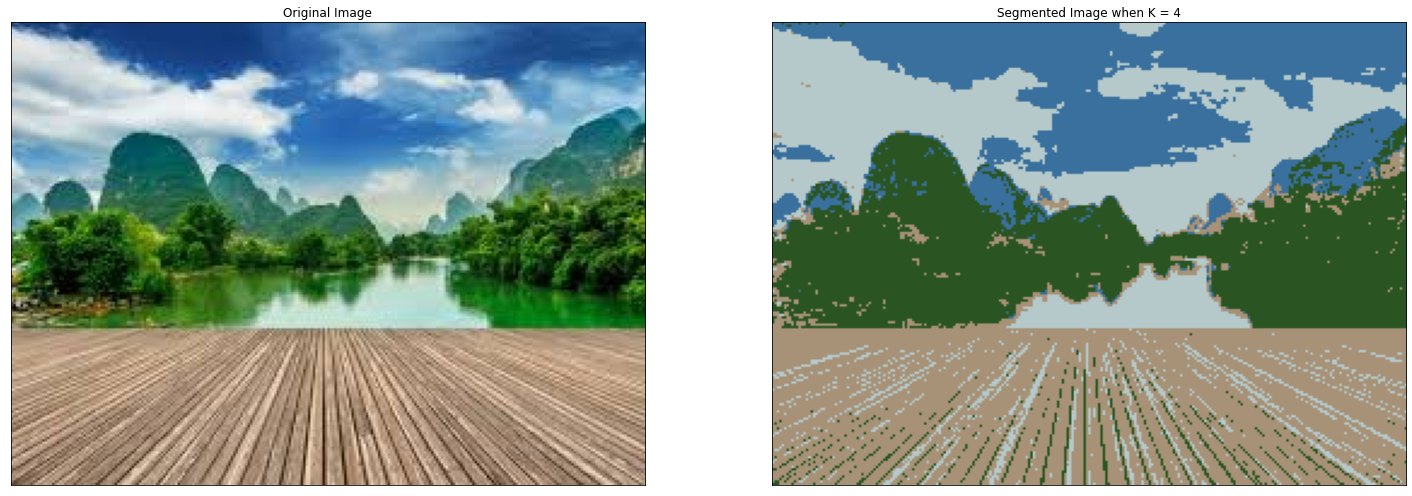

In [33]:
figure_size = 25
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(result_image)
plt.title('Segmented Image when K = %i' %k), plt.xticks([]), plt.yticks([])
plt.show()